In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


### Data Cleaning


In [4]:
#Check missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
#Check Duplicate values
df.duplicated().sum()

415

In [6]:
# removing duplicte values

df = df.drop_duplicates(keep='first')

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(5157, 2)

In [9]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [10]:
df['Category'] = enc.fit_transform(df['Category'])

In [11]:
df.sample(7)

,Category,Message
4958,0,I'm vivek:)i got call from your number.
4023,0,U gd lor go shopping i got stuff to do. U wan ...
1854,0,I just made some payments so dont have that mu...
1364,0,"Yetunde, i'm sorry but moji and i seem too bus..."
1915,1,New TEXTBUDDY Chat 2 horny guys in ur area 4 j...
2832,0,Thanx 4 sending me home...
3033,0,Jokin only lar... :-) depends on which phone m...


### EDA

In [12]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Checking amount of spam and Ham
df['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

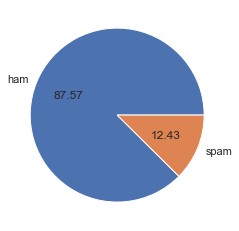

In [14]:
# Representing it in form of pie chart
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

##### Data is imbalanced, ie amount of ham messages are much more than spam messages

In [15]:
import nltk

In [16]:
!pip install nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sid10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# no. of characters in message
df['no.of_characters'] = df['Message'].apply(len)

In [19]:
df.head()

,Category,Message,no.of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
# no. of words in message
df['no.of_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df.head()

,Category,Message,no.of_characters,no.of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
# no. of sentences in message
df['no.of_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,Category,Message,no.of_characters,no.of_words,no.of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['no.of_characters','no.of_words','no.of_sentences']].describe()

,no.of_characters,no.of_words,no.of_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560016,1.965290
std,58.382922,13.403671,1.439549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


##### Analysing Ham And Spam seperately

In [25]:
# ham
df[df['Category'] == 0][['no.of_characters','no.of_words','no.of_sentences']].describe()

,no.of_characters,no.of_words,no.of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267272,1.822852
std,56.708301,13.585433,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#spam
df[df['Category'] == 1][['no.of_characters','no.of_words','no.of_sentences']].describe()

,no.of_characters,no.of_words,no.of_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.968799
std,30.399707,7.103501,1.486069
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='no.of_characters', ylabel='Count'>

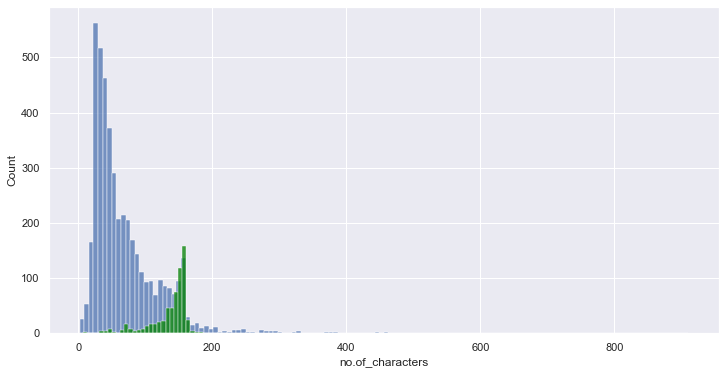

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['no.of_characters'])
sns.histplot(df[df['Category'] == 1]['no.of_characters'],color='green')

<AxesSubplot:xlabel='no.of_words', ylabel='Count'>

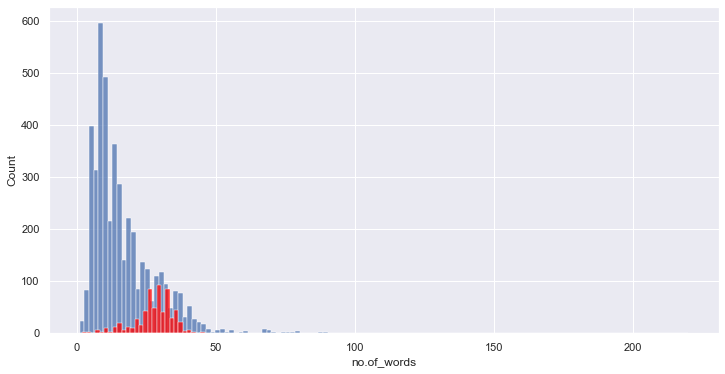

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['no.of_words'])
sns.histplot(df[df['Category'] == 1]['no.of_words'],color='red')

<Figure size 864x432 with 0 Axes>

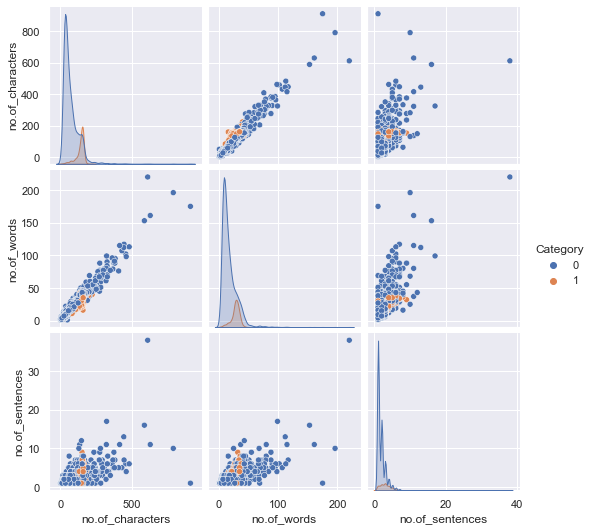

In [29]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='Category')

<AxesSubplot:>

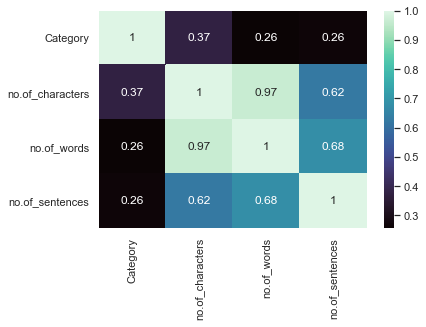

In [30]:
sns.heatmap(df.corr(),annot=True, cmap='mako')

### Data Pre-processing

In [31]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [32]:
ps = PorterStemmer()

In [33]:
def transform_text(text):
    text = text.lower()              # convert to lower case
    text = nltk.word_tokenize(text)  # tokenization
    
    y = []
    for i in text:
        if i.isalnum():    # removing special characters fro the sentence
            y.append(i)
    
    text = y[:]    # list is mutable, to copy list we do cloning
    y.clear()
    
    for i in text:  # Removing stopwords and punctuation marks
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))  # Stemming (converting similar words to a single word)
    
            
    return " ".join(y)

In [34]:
transform_text('Hey!,did you watched yesterdays match?')

'hey watch yesterday match'

In [35]:
df['Message_transformed'] = df['Message'].apply(transform_text)

In [36]:
df.head()

,Category,Message,no.of_characters,no.of_words,no.of_sentences,Message_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
from wordcloud import WordCloud
wc = WordCloud()

In [38]:
spam_words = wc.generate(df[df['Category'] == 1]['Message_transformed'].str.cat(sep=" "))

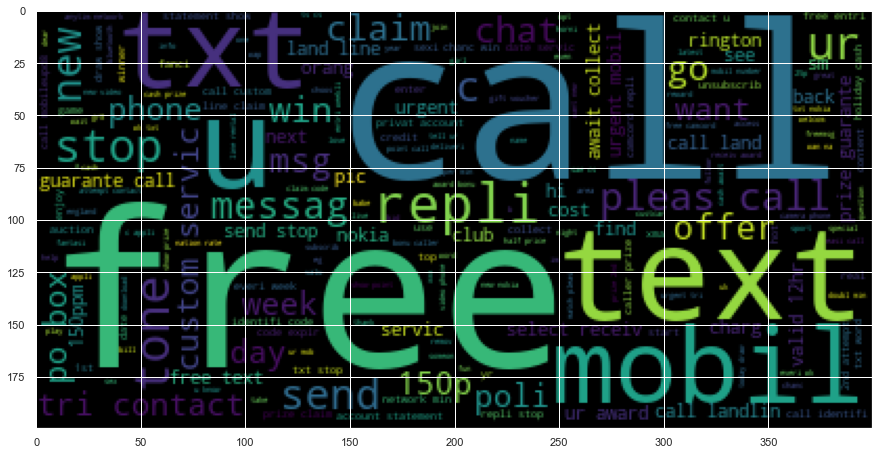

In [39]:
plt.figure(figsize=(15,8))
plt.imshow(spam_words)

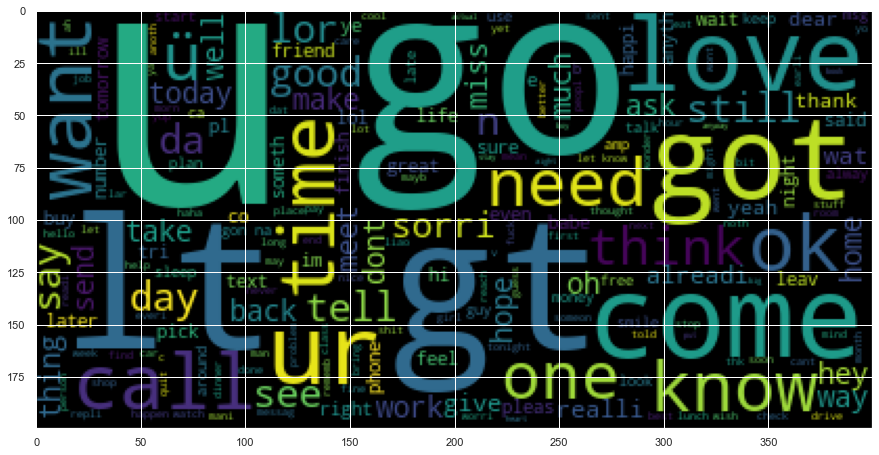

In [40]:
ham_words = wc.generate(df[df['Category'] == 0]['Message_transformed'].str.cat(sep=" "))

plt.figure(figsize=(15,8))
plt.imshow(ham_words)

In [41]:
# top 30 spam words

spam_corpus = []
for msg in df[df['Category'] == 1]['Message_transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [42]:
len(spam_corpus)

9781

C:\Users\sid10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


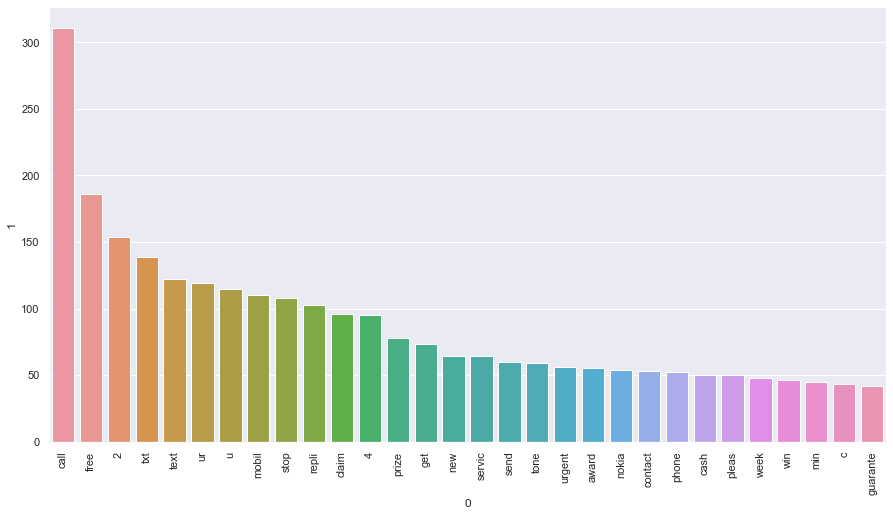

In [43]:
from collections import Counter
plt.figure(figsize=(15,8))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
# top 30 ham words

ham_corpus = []
for msg in df[df['Category'] == 0]['Message_transformed'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [45]:
len(ham_corpus)

35938

C:\Users\sid10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


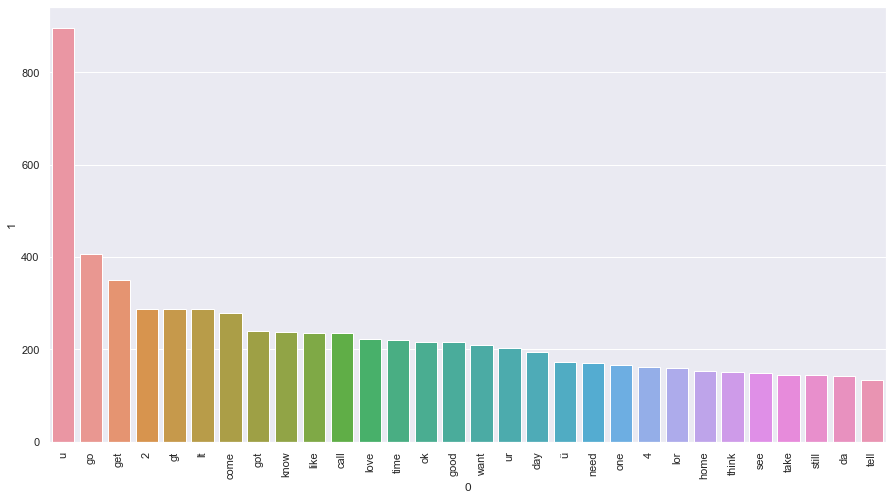

In [46]:
from collections import Counter
plt.figure(figsize=(15,8))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [47]:
# Vectorization

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()

In [48]:
X = cv.fit_transform(df['Message_transformed']).toarray()

In [49]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
X.shape

(5157, 6781)

In [51]:
y = df['Category'].values

In [52]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)

In [55]:
# Naive bayes works best for text classification because of its assumption that each input variable is independent

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [57]:
gnb.fit(X_train,y_train)
cv_y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,cv_y_pred1))
print(confusion_matrix(y_test,cv_y_pred1))
print(precision_score(y_test,cv_y_pred1))

0.8817829457364341
[[812 107]
 [ 15  98]]
0.47804878048780486


In [58]:
mnb.fit(X_train,y_train)
cv_y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,cv_y_pred2))
print(confusion_matrix(y_test,cv_y_pred2))
print(precision_score(y_test,cv_y_pred2))

0.9757751937984496
[[900  19]
 [  6 107]]
0.8492063492063492


In [59]:
bnb.fit(X_train,y_train)
cv_y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,cv_y_pred3))
print(confusion_matrix(y_test,cv_y_pred3))
print(precision_score(y_test,cv_y_pred3))

0.9777131782945736
[[915   4]
 [ 19  94]]
0.9591836734693877


##### Here we give Precision score more importance than accuracy because the data is imbalanced

In [60]:
## Trying out other classification models

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [62]:
logreg = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [63]:
models = {
    logreg: "Logistic Regression",
    svc: "Support Vector Machine",
    knc: "K Nearest Neighbour",
    dtc: "Decision Tree",
    rfc: "Random Forest",
    xgb: "XgBoost Classifier"
  
}

def train_models(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

accuracy_scores = []
precision_scores = []

for model,name in models.items():
    
    current_accuracy,current_precision = train_models(model, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Logistic Regression
Accuracy -  0.9806201550387597
Precision -  0.9603960396039604

For  Support Vector Machine
Accuracy -  0.9321705426356589
Precision -  0.6837606837606838

For  K Nearest Neighbour
Accuracy -  0.9292635658914729
Precision -  1.0

For  Decision Tree
Accuracy -  0.9467054263565892
Precision -  0.881578947368421

For  Random Forest
Accuracy -  0.9815891472868217
Precision -  0.9895833333333334



C:\Users\sid10\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:56:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  XgBoost Classifier
Accuracy -  0.9796511627906976
Precision -  0.9339622641509434



##### In hopes of improving the precision score we try the same above procedure with tfidf

In [64]:
tfidf = TfidfVectorizer(max_features= 3000)

In [65]:
X = tfidf.fit_transform(df['Message_transformed']).toarray()


In [66]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
X.shape

(5157, 3000)

In [68]:
y = df['Category'].values

In [69]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)


In [71]:
gnb_tf = GaussianNB()
mnb_tf = MultinomialNB()
bnb_tf = BernoulliNB()


In [72]:
gnb_tf.fit(X_train,y_train)
tf_y_pred1 = gnb_tf.predict(X_test)
print(accuracy_score(y_test,tf_y_pred1))
print(confusion_matrix(y_test,tf_y_pred1))
print(precision_score(y_test,tf_y_pred1))

0.875968992248062
[[807 112]
 [ 16  97]]
0.46411483253588515


In [73]:
mnb_tf.fit(X_train,y_train)
tf_y_pred2 = mnb_tf.predict(X_test)
print(accuracy_score(y_test,tf_y_pred2))
print(confusion_matrix(y_test,tf_y_pred2))
print(precision_score(y_test,tf_y_pred2))



0.9854651162790697
[[919   0]
 [ 15  98]]
1.0


In [74]:
bnb_tf.fit(X_train,y_train)
tf_y_pred3 = bnb_tf.predict(X_test)
print(accuracy_score(y_test,tf_y_pred3))
print(confusion_matrix(y_test,tf_y_pred3))
print(precision_score(y_test,tf_y_pred3))

0.9864341085271318
[[917   2]
 [ 12 101]]
0.9805825242718447


In [75]:
logreg_tf = LogisticRegression(solver='liblinear', penalty='l1')
svc_tf = SVC(kernel='sigmoid', gamma=1.0)
knc_tf = KNeighborsClassifier()
dtc_tf = DecisionTreeClassifier(max_depth=5)
rfc_tf = RandomForestClassifier(n_estimators=50, random_state=2)
xgb_tf = XGBClassifier(n_estimators=50,random_state=2)

models = {
    logreg_tf: "Logistic Regression",
    svc_tf: "Support Vector Machine",
    knc_tf: "K Nearest Neighbour",
    dtc_tf: "Decision Tree",
    rfc_tf: "Random Forest",
    xgb_tf: "XgBoost Classifier"
  
}

accuracy_scores = []
precision_scores = []

for model,name in models.items():
    
    current_accuracy,current_precision = train_models(model, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Logistic Regression
Accuracy -  0.9641472868217055
Precision -  0.9634146341463414

For  Support Vector Machine
Accuracy -  0.9854651162790697
Precision -  0.99

For  K Nearest Neighbour
Accuracy -  0.9341085271317829
Precision -  1.0

For  Decision Tree
Accuracy -  0.9408914728682171
Precision -  0.7653061224489796

For  Random Forest
Accuracy -  0.9806201550387597
Precision -  0.9696969696969697



C:\Users\sid10\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  XgBoost Classifier
Accuracy -  0.9699612403100775
Precision -  0.8796296296296297



In [76]:
# Trying to further improve the model using voting classifier

### Top 3 model for voting classifier

#### Random Forest (rfc - countvector)
#### MultinomialNB (mnb_tf - tfidf)
#### Support Vector Machine (svc_tf - tfidf)


In [77]:
from sklearn.ensemble import VotingClassifier

In [78]:
rf = RandomForestClassifier(n_estimators=50, random_state=2)
mnb2 = MultinomialNB()
svm = SVC(kernel='sigmoid', gamma=1.0,probability=True)


In [79]:
voting = VotingClassifier(estimators=[('rf', rf), ('nb', mnb2), ('svm', svm)],voting='soft')

In [80]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True))],
                 voting='soft')

In [81]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9883720930232558
Precision 0.9902912621359223


#### Still the MultinomialNb outperforms voting classifier so we will use mnb as our model

In [82]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb_tf,open('model.pkl','wb'))